In [1]:
# Imports

from cltkreaders.lat import LatinTesseraeCorpusReader
from collections import defaultdict
from pprint import pprint
import pickle

# Imports; for plotting

import seaborn as sns
import matplotlib.pyplot as plt
pal = sns.color_palette("colorblind")

In [2]:
# Setup corpus

T = LatinTesseraeCorpusReader()

print(f'There are {len(T.fileids())} files in this corpus.\n')
print(f'Here are the first five (5) files: {T.fileids()[:5]}')

There are 748 files in this corpus.

Here are the first five (5) files: ['ammianus.rerum_gestarum.part.14.tess', 'ammianus.rerum_gestarum.part.15.tess', 'ammianus.rerum_gestarum.part.16.tess', 'ammianus.rerum_gestarum.part.17.tess', 'ammianus.rerum_gestarum.part.18.tess']


In [3]:
# Collect matches in all texts

orbis_counts = defaultdict(int)

for file in T.fileids():
    lines = next(T.doc_rows(file))
    lines = list(lines.items())
    for citation, line in lines:
        if 'orbis' in line:
            orbis_counts[file] += 1
        else:
            orbis_counts[file] += 0

pprint(f'The first five (5) files are {T.fileids()[:5]}.')
print()
print(f'The first five (5) orbis counts are {list(orbis_counts.values())[:5]}.')

("The first five (5) files are ['ammianus.rerum_gestarum.part.14.tess', "
 "'ammianus.rerum_gestarum.part.15.tess', "
 "'ammianus.rerum_gestarum.part.16.tess', "
 "'ammianus.rerum_gestarum.part.17.tess', "
 "'ammianus.rerum_gestarum.part.18.tess'].")

The first five (5) orbis counts are [2, 2, 0, 2, 1].


In [4]:
# Collect matches in all texts

et_counts = defaultdict(int)

for file in T.fileids():
    lines = next(T.doc_rows(file))
    lines = list(lines.items())
    for citation, line in lines:
        if 'et' in line:
            et_counts[file] += 1
        else:
            et_counts[file] += 0

print(f'The first five (5) et counts are {list(et_counts.values())[:5]}.')

The first five (5) et counts are [161, 154, 169, 152, 102].


In [5]:
# Get word counts for all texts

word_counts = pickle.load(open('../data/latin_word_counts.pickle', 'rb'))

print(f'The first five (5) word counts are {list(word_counts.values())[:5]}.')

The first five (5) word counts are [9841, 8171, 9165, 8927, 6105].


In [6]:
# Normalize counts

orbis_norm_counts = defaultdict(float)

for i, item in enumerate(orbis_counts.items()):
    text = item[0]
    orbis_count = item[1]
    word_count = list(word_counts.values())[i]
    norm_count = (orbis_count / word_count) * 1000
    orbis_norm_counts[text] = norm_count

list(orbis_norm_counts.items())[:5]    

[('ammianus.rerum_gestarum.part.14.tess', 0.203231378924906),
 ('ammianus.rerum_gestarum.part.15.tess', 0.24476808224207564),
 ('ammianus.rerum_gestarum.part.16.tess', 0.0),
 ('ammianus.rerum_gestarum.part.17.tess', 0.2240394309398454),
 ('ammianus.rerum_gestarum.part.18.tess', 0.1638001638001638)]

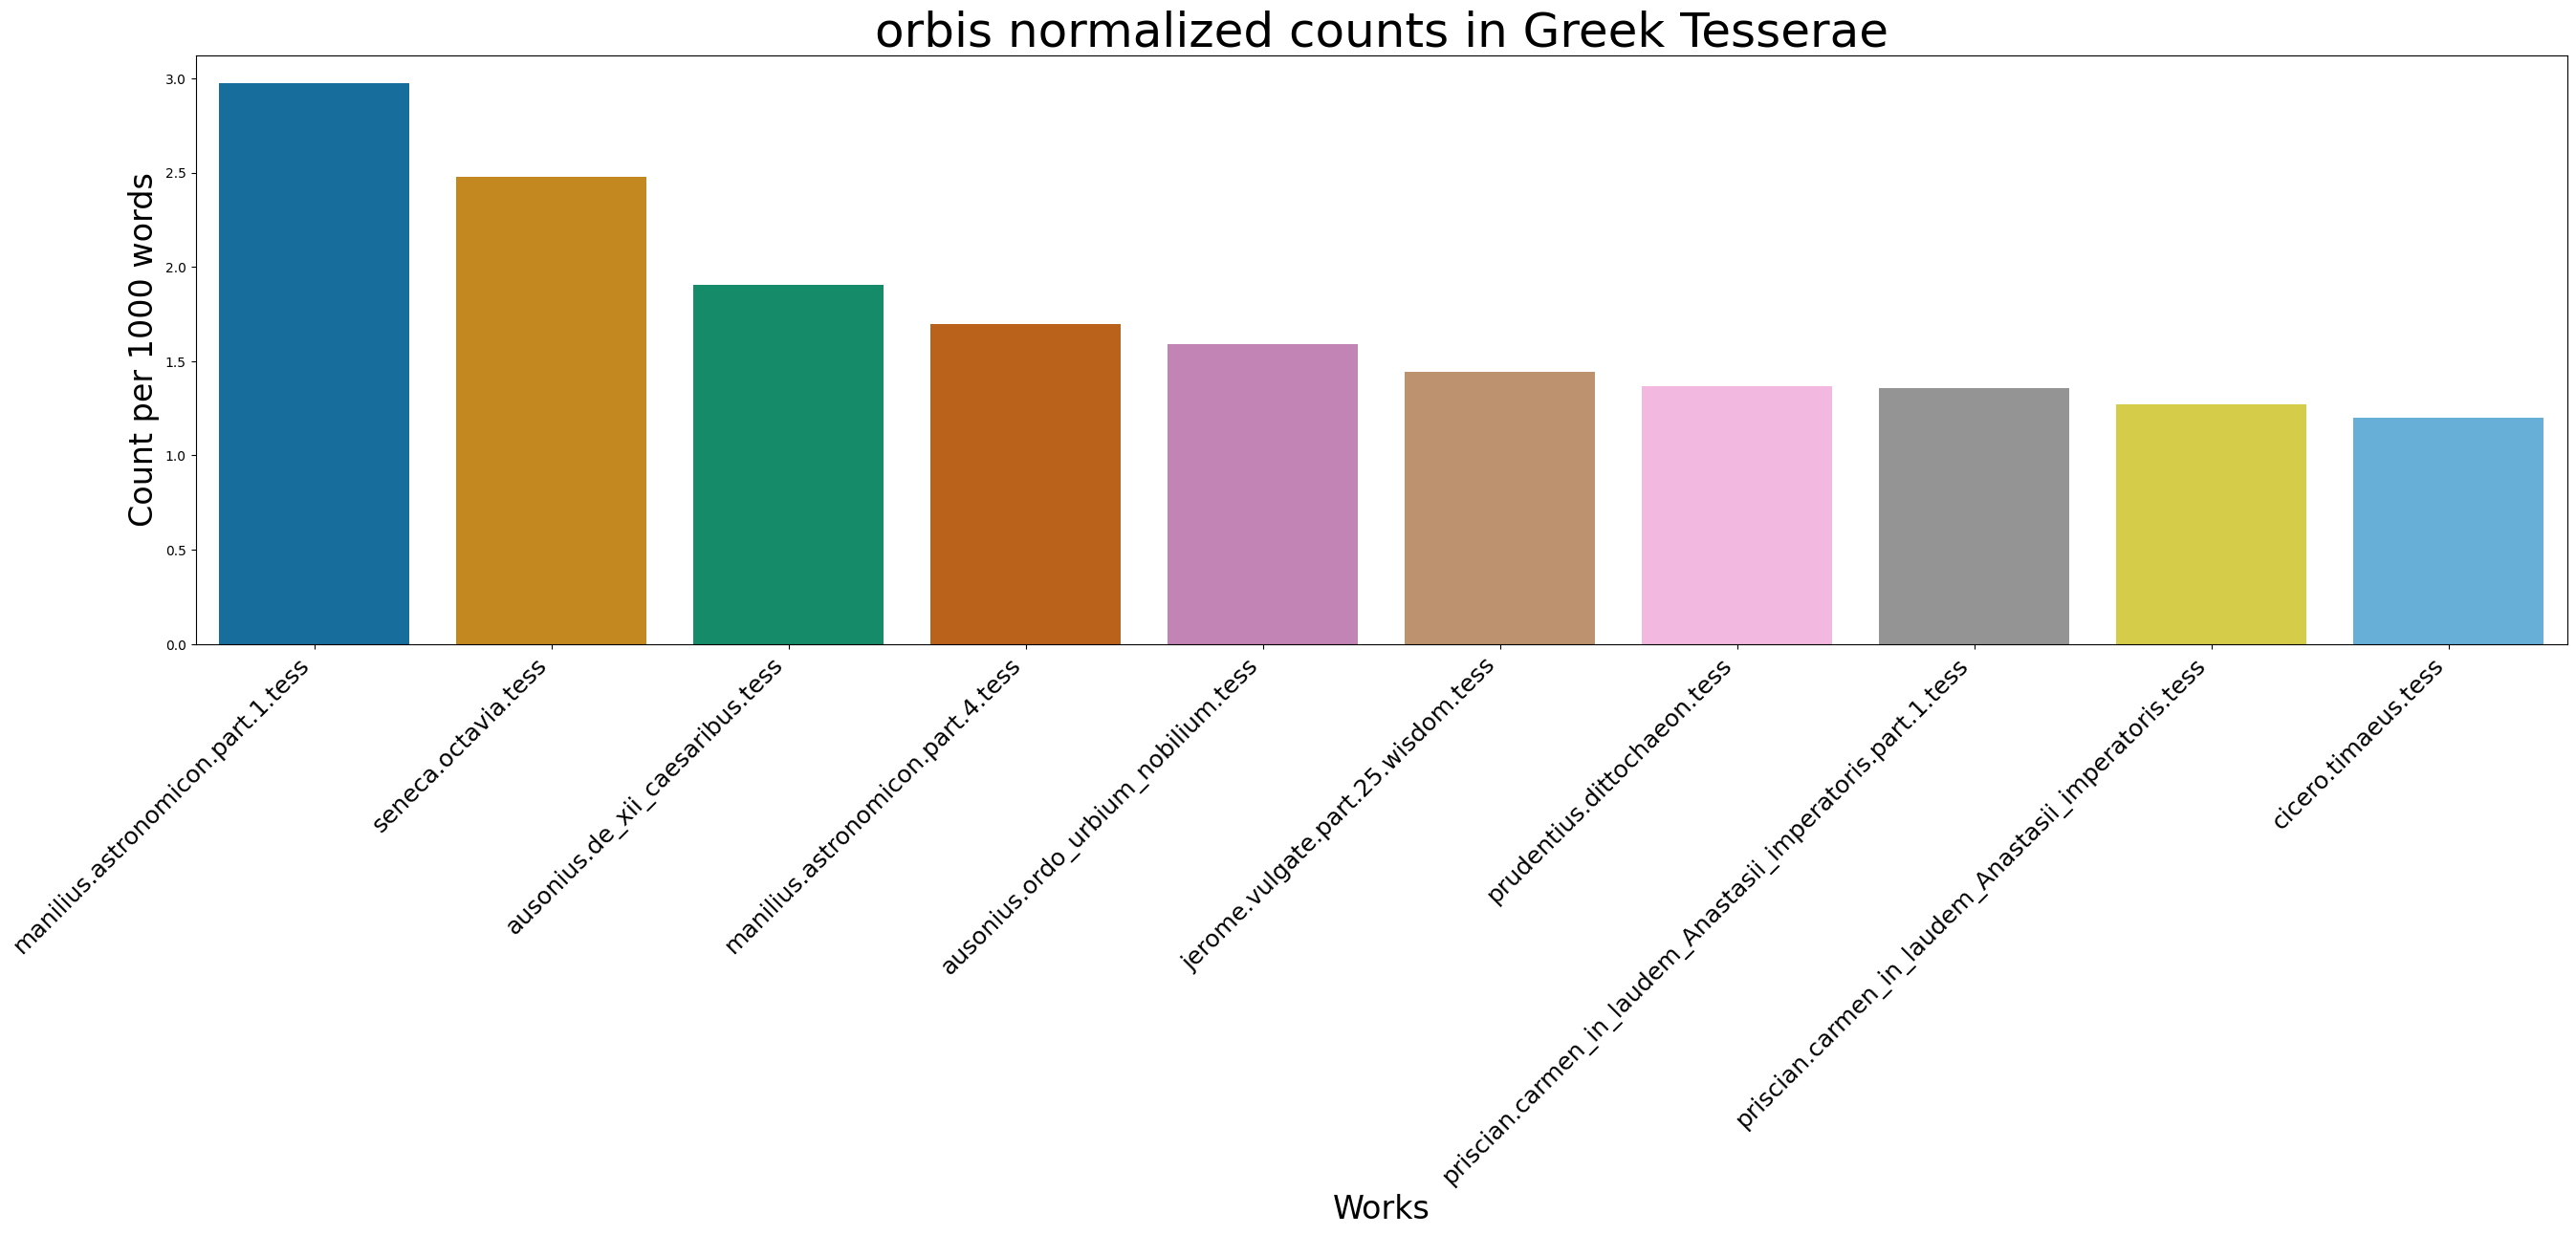

In [7]:
# Make bar plot of normalized data

orbis_norm_counts_sorted = dict(sorted(list(orbis_norm_counts.items()), key=lambda x: x[1], reverse=True)[:10])
keys = list(orbis_norm_counts_sorted.keys())
vals = list(orbis_norm_counts_sorted.values())

plt.figure(figsize=(32, 8))
ax = sns.barplot(x=keys, y=vals, palette=pal);
plt.title('orbis normalized counts in Latin Tesserae', fontsize=36)
plt.xlabel('Works', fontsize=24)
plt.ylabel('Count per 1000 words', fontsize=24)

ax.set_xticklabels(labels=keys, rotation=45, horizontalalignment='right', fontsize=18);
# ax.set_yticks(range(0, max(vals), 2))
plt.show()